In [21]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
# ler dataset
data = pd.read_excel('4647_dataset_clorofila_classif_iqar.xlsx')
df = data[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','Classe']]
df = df.dropna()
df

,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12,Classe
0,31.0,51,16,1,1,1,1.0,1,1.0,1.0,1,1,1
1,31.0,51,16,1,1,1,1.0,1,1.0,1.0,1,1,1
2,31.0,51,16,1,1,1,1.0,1,1.0,1.0,1,1,1
3,31.0,51,16,1,1,1,1.0,1,1.0,1.0,1,1,1
4,31.0,51,16,1,1,1,1.0,1,1.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,4195.0,4845,4470,4030,4431,4510,4495.0,4926,4548.0,6548.0,4599,3952,6
4361,4210.0,5399,4967,4527,4781,4357,4109.0,5068,3952.0,6951.0,4815,4130,2
4362,5624.0,6948,6150,5539,5592,5495,5381.0,6818,5334.0,5893.0,4808,4161,3
4363,4011.0,3698,3711,3699,4144,4748,4895.0,5163,4981.0,7035.0,4811,4178,4


In [67]:
# pegar so de um dataset
df_EUA = data[data['Dominio']=='PMQs']
df = df_EUA[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','Classe']]
df = df.dropna()
df

,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12,Classe
41,171.0,278,505,192,121,42,42.0,42,28.0,2.0,6,5,1
42,159.0,184,304,106,71,30,46.0,41,40.0,6.0,8,5,1
43,159.0,184,304,106,71,30,46.0,41,40.0,6.0,8,5,1
50,125.0,203,345,109,72,35,42.0,46,36.0,6.0,10,6,1
75,173.0,185,240,77,65,35,40.0,33,38.0,14.0,13,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,2515.0,3214,3420,3257,3630,3767,3795.0,3612,3791.0,5484.0,3894,3623,2
4334,6559.0,6050,5742,5354,5617,5443,5551.0,5108,5449.0,9367.0,4307,3852,1
4335,6559.0,6050,5742,5354,5617,5443,5551.0,5108,5449.0,9367.0,4307,3852,1
4336,8027.0,7114,6614,6357,7041,6498,6164.0,6018,5968.0,15786.0,3777,3901,1


In [68]:
X = df[df.columns.drop('Classe')]
y = df['Classe']

In [69]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', verbose=1).fit_transform(X)
print(X_embedded.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 687 samples in 0.002s...
[t-SNE] Computed neighbors for 687 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 687 / 687
[t-SNE] Mean sigma: 73.159231
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.173840
[t-SNE] KL divergence after 1000 iterations: 0.128046
(687, 2)


[Text(0.5, 1.0, 'data T-SNE projection')]

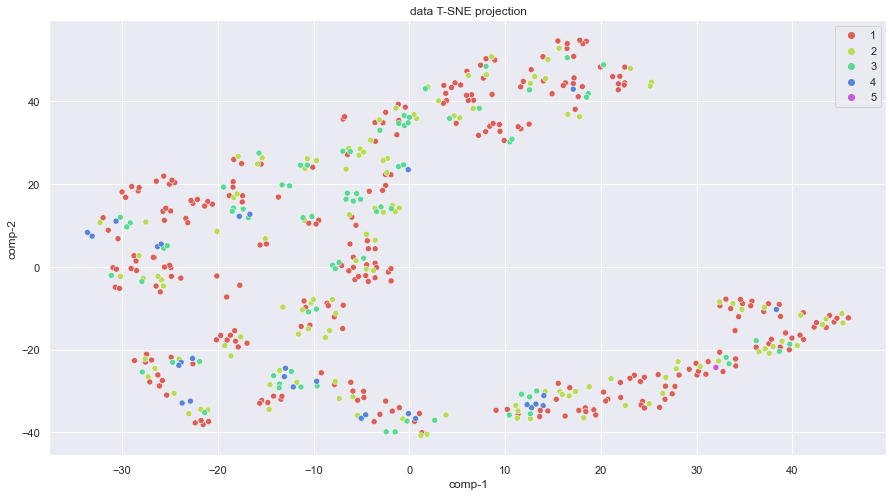

In [71]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="data T-SNE projection") 